# Connect fours


In [2]:
#imports
import os
import numpy as np
import matplotlib.pyplot as plt
from pettingzoo.classic import connect_four_v3

# Probleemstelling

Connect Four is een strategisch bordspel waarin twee spelers om de beurt schijven in een bord laten vallen. Het doel is om als eerste vier schijven op een rij te krijgen, horizontaal, verticaal of diagonaal.Het kan erg lastig zijn voor spelers om telkens de beste zet te maken. Omdat het spel meerdere mogelijke zetten en strategische varianten heeft, zien spelers niet altijd alle kansen of dreigingen. Dit kan leiden tot fouten: spelers missen soms een winnende zet of laten de tegenstander een winnende kans liggen.

**Doelstelling**

We willen een systeem ontwikkelen dat automatisch de beste zet bepaalt om:

- Het risico op fouten te verkleinen. 
- Het spel strategisch wordt benaderd, zowel om te winnen als om te voorkomen dat de tegenstander wint.


**Een rule-based systeem is geschikt omdat Connect Four duidelijke regels heeft, zoals:**

- Spelers doen om de beurt een zet.
- Een schijf valt naar de laagste vrije plek in een kolom.
- Het doel is om vier op een rij te krijgen.


**Met een rule-based systeem kun je deze regels programmeren zonder dat het systeem zelf hoeft te leren via data. Je maakt gewoon een set regels die het systeem volgt, zoals:**

- Blokkeer de tegenstander als die bijna wint.
- Maak een winnende zet als dit mogelijk is.
- Neem het midden in beslag


**Voordelen van een rule based system**
- Eenvoudig te begrijpen: De regels van Connect Four zijn helder en kunnen direct als logische voorwaarden worden geprogrammeerd.
- Snelle implementatie: Je hoeft geen grote dataset te verzamelen en te trainen zoals bij machine learning.
- Controleerbaarheid: Omdat het regels volgt die zelf zijn gemaakt, weet je waarom het systeem bepaalde beslissingen neemt.
  
**Machine learning zou hier minder effectief zijn omdat:**
- Veel data nodig: Machine learning vereist grote hoeveelheden data om effectief te zijn.
- Onvoorspelbaar: Het model mogelijk willekeurige beslissingen neemt zonder dat je weet waarom.
- Minder uitlegbaar: Het is lastiger om te begrijpen waarom het model een bepaalde zet kiest.

# Methodologie

**Ontwerp van de regels**

Het rule-based systeem past regels in een vaste volgorde toe om de meest optimale zet te bepalen. De regels zijn als volgt:

1.	Maak een winnende zet: Controleer of er een zet is die direct leidt tot vier op een rij en voer deze uit.
2.	Blokkeer de tegenstander: Als de tegenstander dreigt te winnen, blokkeer deze zet.
3.	Speel naar het midden: Indien er geen directe winst of blokkering nodig is, kies dan voor een zet in het midden van het bord. Dit geeft later meer kansen. 
4.	Bouw kansen: Plaats schijven zodanig dat ze toekomstige winnende lijnen mogelijk maken.
5.	Voorkom meerdere opties voor de tegenstander: Minimaliseer de kansen voor de tegenstander om verschillende dreigingen tegelijkertijd te vormen.


**Implementatiedetails**

De implementatie is opgebouwd uit de volgende stappen:

1.	Spelbord representatie: Er wordt een bord gemaakt waarin lege vakjes, schijven van speler 1 en schijven van speler 2 worden weergegeven.
2.	Regelcontrole: Elke regel wordt in volgorde toegepast. Zodra een regel een geldige zet vindt, wordt deze uitgevoerd.
3.	Prioritering: De regels worden in een vaste volgorde verwerkt. Wanneer een hogere prioriteitsregel wordt geactiveerd, wordt deze direct uitgevoerd en worden lagere regels overgeslagen.

In [3]:
os.chdir("..")  # dit gaat 1 map omhoog

In [4]:
from src.agents import ConnectFourAgent, RandomAgent, DoubleMoveAgent

In [5]:
!python -m unittest discover tests

.
----------------------------------------------------------------------
Ran 1 test in 0.000s

OK


# Validatie en vergelijking

In [6]:
def evaluate_agents(agent1, agent2, n_games=50):
    """
    Laat agent1 en agent2 meerdere potjes Connect Four spelen.

    Parameters:
    - agent1: De eerste agent die deelneemt aan het spel.
    - agent2: De tweede agent die deelneemt aan het spel. 
    - n_games (int, optioneel): Het aantal spellen dat de agents tegen elkaar spelen. 

    Returns:
    - wins_agent1 (int): Het aantal overwinningen van agent1.
    - wins_agent2 (int): Het aantal overwinningen van agent2.
    - draws (int): Het aantal gelijke spelen.
    
    """
    wins_agent1 = 0
    wins_agent2 = 0
    draws = 0

    for _ in range(n_games):
        env = connect_four_v3.env(render_mode=None)
        env.reset()
        
        done = False
        
        while not done:
            obs = env.observe(env.agent_selection)
            board = obs['observation'][:,:,0]
            
            current_player_id = 1 if env.agent_selection == "player_0" else 2
            
            # Kies de juiste agent
            if current_player_id == agent1.player:
                move = agent1.select_action(board)
            else:
                move = agent2.select_action(board)
            
            env.step(move)
            done = any(env.terminations.values()) or any(env.truncations.values())

        reward_p0 = env.rewards["player_0"]
        reward_p1 = env.rewards["player_1"]
        if reward_p0 == 1:
            winner = 1
        elif reward_p1 == 1:
            winner = 2
        else:
            winner = 0  # gelijkspel

        if winner == agent1.player:
            wins_agent1 += 1
        elif winner == agent2.player:
            wins_agent2 += 1
        else:
            draws += 1

    return wins_agent1, wins_agent2, draws

In [6]:
# Maak de agents aan
rule_agent = ConnectFourAgent(player=1)
random_agent = RandomAgent(player=2)

# 50 potjes spelen
wins_rule, wins_random, draws = evaluate_agents(rule_agent, random_agent, n_games=3)

print(f"Resultaten over 10 potjes:")
print(f" - Rule-based agent (player=1) heeft gewonnen: {wins_rule}")
print(f" - Random agent     (player=2) heeft gewonnen: {wins_random}")
print(f" - Gelijke spelen: {draws}")

Resultaten over 10 potjes:
 - Rule-based agent (player=1) heeft gewonnen: 2
 - Random agent     (player=2) heeft gewonnen: 1
 - Gelijke spelen: 0


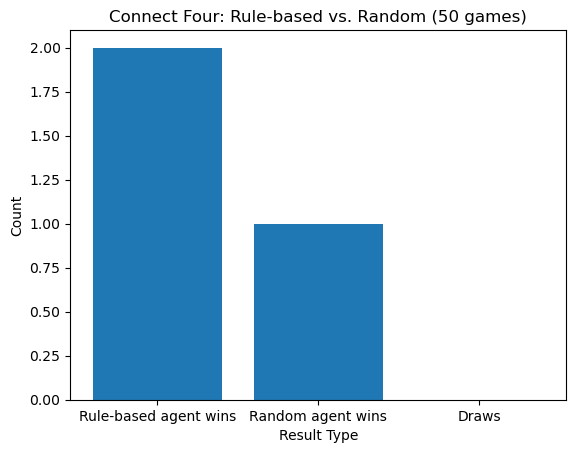

In [7]:
labels = ["Rule-based agent wins", "Random agent wins", "Draws"]
scores = [wins_rule, wins_random, draws]

plt.bar(labels, scores)
plt.title("Connect Four: Rule-based vs. Random (50 games)")
plt.xlabel("Result Type")
plt.ylabel("Count")
plt.show()

In [8]:
# Maak de agents aan
random_agent = RandomAgent(player=2)

# ConnectFourAgent vs RandomAgent
connect_four_agent = ConnectFourAgent(player=1)
wins_connect, wins_random_c4, draws_c4 = evaluate_agents(connect_four_agent, random_agent, n_games=100)

print("Resultaten: ConnectFourAgent vs RandomAgent")
print(f" - ConnectFourAgent (player=1) heeft gewonnen: {wins_connect}")
print(f" - RandomAgent (player=2) heeft gewonnen: {wins_random_c4}")
print(f" - Gelijke spelen: {draws_c4}")

# DoubleMoveAgent vs RandomAgent
double_move_agent = DoubleMoveAgent(player=1)
wins_double, wins_random_dm, draws_dm = evaluate_agents(double_move_agent, random_agent, n_games=100)

print("\nResultaten: DoubleMoveAgent vs RandomAgent")
print(f" - DoubleMoveAgent (player=1) heeft gewonnen: {wins_double}")
print(f" - RandomAgent (player=2) heeft gewonnen: {wins_random_dm}")
print(f" - Gelijke spelen: {draws_dm}")

[WARNING]: Illegal move made, game terminating with current player losing. 
obs['action_mask'] contains a mask of all legal moves that can be chosen.
[WARNING]: Illegal move made, game terminating with current player losing. 
obs['action_mask'] contains a mask of all legal moves that can be chosen.


KeyboardInterrupt: 

Hier zijn de drie agents uitgelegd in simpele taal, inclusief hoe ze werken, waarom ze zo zijn ontworpen, en hun voor- en nadelen:

1. ConnectFourAgent
Slimme agent die gebruikmaakt van Minimax met alpha-beta pruning en iteratieve verdieping

Hoe werkt het?
Minimax-algoritme:

De agent denkt vooruit en probeert uit te rekenen wat de beste zet is.

Hij kijkt naar elke mogelijke zet en probeert te voorspellen hoe de tegenstander zal reageren.

Het doel is om een zet te kiezen die leidt tot winst of de tegenstander dwingt tot een slechte zet.

Alpha-beta pruning:

Het algoritme stopt met het bekijken van sommige zetten als het zeker is dat ze slechter zijn dan een andere optie.

Dit bespaart rekentijd en maakt het algoritme sneller.

Iteratieve verdieping:

De agent zoekt eerst oppervlakkig naar de beste zet (bijvoorbeeld 1 stap vooruit).

Daarna zoekt hij dieper (2 stappen, dan 3 stappen, enz.) zolang er genoeg tijd is.

Als de tijd bijna op is, gebruikt hij de beste zet die hij tot dan toe heeft gevonden.

Transpositietabel:

De agent onthoudt eerder berekende standen in een soort geheugen (hash table).

Als hij dezelfde stand later opnieuw tegenkomt, hoeft hij die niet opnieuw te berekenen — dat bespaart tijd.

Move ordering:

De agent onderzoekt eerst zetten die dichter bij het midden van het bord zijn, omdat die vaak sterker zijn.

Waarom werkt het zo?
Minimax is een krachtig algoritme voor spellen waarbij twee spelers om de beurt spelen.

Alpha-beta pruning versnelt het algoritme aanzienlijk door overbodige zetten over te slaan.

Iteratieve verdieping zorgt ervoor dat de agent slim omgaat met beperkte rekentijd.

De transpositietabel voorkomt dubbel werk en bespaart tijd.

Moves in het midden van het bord zijn vaak beter omdat ze meer verbindingsmogelijkheden geven.

Voordelen:
Heel slim: moeilijk te verslaan.
Past zich aan aan de beschikbare rekentijd.
Kan complexe strategieën uitvoeren.
Sneller door het gebruik van alpha-beta pruning en transpositietabel.

Nadelen:
Kost veel rekentijd als het bord bijna vol is.
Werkt minder goed als het bord heel groot is.
Heeft moeite met situaties waarbij er heel veel goede zetten zijn.
2. RandomAgent
Simpelste agent die een willekeurige zet doet

Hoe werkt het?
De agent kijkt naar alle kolommen waar nog een zet mogelijk is.

Hij kiest willekeurig één van die kolommen.

Waarom werkt het zo?
Een random agent is makkelijk te programmeren en dient als basis om te testen of het spel werkt.

Het is een snelle manier om te controleren of het spelmechanisme goed werkt.

Voordelen:
Supersimpel.
Werkt altijd.
Snelle reactie omdat er weinig rekentijd nodig is.

Nadelen:
Helemaal niet slim — makkelijk te verslaan.
Geen strategie of planning.

3. DoubleMoveAgent
Rule-based agent die probeert een dubbele zet te forceren

Hoe werkt het?
Dubbele zet proberen te maken:

De agent kijkt eerst of hij een zet kan doen waardoor hij op de volgende beurt twee winnende mogelijkheden krijgt (een dubbele dreiging).

Als dat lukt, zal de tegenstander onmogelijk beide dreigingen kunnen blokkeren.

Blokkeren van de tegenstander:

Als de tegenstander een directe winstkans heeft, zal de agent die blokkeren.

Opnieuw proberen een dubbele zet te maken:

Als het blokken klaar is, probeert de agent opnieuw een dubbele zet te creëren.

Willekeurige zet:

Als er geen dubbele zet of blok mogelijk is, kiest de agent een willekeurige zet.

Waarom werkt het zo?
Dubbele dreigingen zijn moeilijk te verdedigen, waardoor deze strategie effectief is.

Het blokkeren van directe winstkansen voorkomt snelle nederlagen.

Als er geen slimme zet is, maakt het doen van een willekeurige zet het spel dynamisch.

Voordelen:
Kiest vaak goede zetten omdat dubbele dreigingen krachtig zijn.
Blokkeert slimme tegenstanders effectief.
Makkelijker te programmeren dan Minimax.

Nadelen:
Werkt alleen goed als er ruimte is om dubbele dreigingen te maken.
Soms voorspelbaar omdat het altijd dezelfde regels volgt.
Slechter dan Minimax in complexe situaties.

In [6]:
!python src/main.py

Kies een kolom (0-6): 


# Resultaten

Uit de bovenstaande grafiek blijkt dat de rule-based agent het vaakst heeft gewonnen. Dit laat zien dat het werken met regels effectief is. De Random agent, die willekeurige zetten doet zonder strategie, heeft daarentegen minder dan vijf keer gewonnen. Dit bevestigt dat de rule-based agent beter presteert.

# Refelctie

**evaluatie**

**beperkingen**